# Rabbits and foxes

There are initially 400 rabbits and 200 foxes on a farm (but it could be two cell types in a 96 well plate or something, if you prefer bio-engineering analogies). Plot the concentration of foxes and rabbits as a function of time for a period of up to 600 days. The predator-prey relationships are given by the following set of coupled ordinary differential equations:

\begin{align}
\frac{dR}{dt} &= k_1 R - k_2 R F \tag{1}\\
\frac{dF}{dt} &= k_3 R F - k_4 F \tag{2}\\
\end{align}

* Constant for growth of rabbits $k_1 = 0.015$ day<sup>-1</sup>
* Constant for death of rabbits being eaten by foxes $k_2 = 0.00004$ day<sup>-1</sup> foxes<sup>-1</sup>
* Constant for growth of foxes after eating rabbits $k_3 = 0.0004$ day<sup>-1</sup> rabbits<sup>-1</sup>
* Constant for death of foxes $k_4 = 0.04$ day<sup>-1</sup>

Also plot the number of foxes versus the number of rabbits.

Then try also with
* $k_3 = 0.00004$ day<sup>-1</sup> rabbits<sup>-1</sup>
* $t_{final} = 800$ days

*This problem is based on one from Chapter 1 of H. Scott Fogler's textbook "Essentials of Chemical Reaction Engineering".*


# Solving ODEs

*Much of the following content reused under Creative Commons Attribution license CC-BY 4.0, code under MIT license (c)2014 L.A. Barba, G.F. Forsyth. Partly based on David Ketcheson's pendulum lesson, also under CC-BY. https://github.com/numerical-mooc/numerical-mooc*

Let's step back for a moment. Suppose we have a first-order ODE $u'=f(u)$. You know that if we were to integrate this, there would be an arbitrary constant of integration. To find its value, we do need to know one point on the curve $(t, u)$. When the derivative in the ODE is with respect to time, we call that point the _initial value_ and write something like this:

$$u(t=0)=u_0$$

In the case of a second-order ODE, $d^2u/dt^2  \equiv u'' = f(u)$, we can write it as a system of first-order ODEs, $u'' = g(u')$ and $u'=h(u)$, and we would need an initial value for each equation: two conditions are needed to determine our constants of integration. **Check that you understand how to do this!** The same applies for higher-order ODEs: if it is of order $n$, we can write it as $n$ first-order equations, and we need $n$ known values. If we have that data, we call the problem an _initial value problem_.

Remember the definition of a derivative? The derivative represents the slope of the tangent at a point of the curve $u=u(t)$, and the definition of the derivative $u'$ for a function is:

$$u'(t) = \lim_{\Delta t\rightarrow 0} \frac{u(t+\Delta t)-u(t)}{\Delta t}$$

If the step $\Delta t$ is already very small, we can _approximate_ the derivative by dropping the limit. We can write:

$$\begin{equation}
u(t+\Delta t) \approx u(t) + u'(t) \Delta t
\end{equation}$$

With this equation, and because we know $u'(t)=f(u)$, if we have an initial value, we can step by $\Delta t$ and find the value of $u(t+\Delta t)$, then we can take this value, and find $u(t+2\Delta t)$, and so on: we say that we _step in time_, numerically finding the solution $u(t)$ for a range of values: $t_1, t_2, t_3 \cdots$, each separated by $\Delta t$. The numerical solution of the ODE is simply the table of values $t_i, u_i$ that results from this process.


## Converting a second-order ODE to a system of first-order ODEs

General idea:
- Introduce a new variable for the first derivative. 
- If the equation is $u'' = f(u, u', t)$, define $v = u'$.
- Then rewrite the second-order equation as a system of two first order equations:
    - $u' = v$
    - $v' = f(u, v, t)$

Example: $u'' = u + 3$
- Let $v = u'$.
- Then the equivalent first-order system is
    - $u' = v$
    - $v' = u + 3$

Initial conditions:
- A second-order ODE needs two initial values, e.g. $u(0) = u_0$ and $u'(0) = v_0$.
- In the system form those become $u(0) = u_0$ and $v(0) = v_0$.

Vector form:
- Define the state vector $w = \begin{pmatrix}u \\[4pt] v\end{pmatrix}$. The system becomes $\dfrac{d}{dt}\begin{pmatrix}u \\[4pt] v\end{pmatrix} = \begin{pmatrix}v \\[4pt] u + 3\end{pmatrix}$.



# Euler's method
*Also known as "Simple Euler" or sometimes "Simple Error".*

The approximate solution at time $t_n$ is $u_n$, and the numerical solution of the differential equation consists of computing a sequence of approximate solutions by the following formula, based on this equation:

$$u_{n+1} = u_n + \Delta t \,f(u_n).$$

This formula is called **Euler's method**.

For the equations of the rabbits and foxes, Euler's method gives the following algorithm that we need to implement in code:

\begin{align}
R_{n+1} & = R_n + \Delta t \left(k_1 R_n - k_2 R_n F_n \right) \\
F_{n+1} & = F_n + \Delta t \left( k_3 R_n F_n - k_4 F_n \right).
\end{align}


These lines will appear at the start of almost all your notebooks, where you import the things you'll need:

In [20]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt

Here are several ways to do it. Not necessarily the best...

In [21]:
k1 = 0.015
k2 = 0.00004
k3 = 0.0004
k4 = 0.04
end_time = 600.0
step_size = 0.1

times = np.arange(0, end_time, step_size)

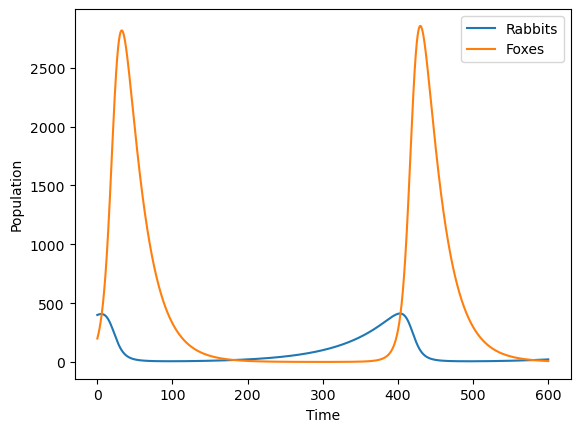

In [22]:
r = 400
f = 200
t = 0

# Make empty lists to hold results.
# This way, we don't need to know how long they'll be.
rs = [r]
fs = [f]

for i in range(1, len(times)):

    dt = times[i] - times[i - 1]

    drdt = k1 * r - k2 * r * f
    dfdt = k3 * r * f - k4 * f

    r = r + drdt * dt
    f = f + dfdt * dt

    rs.append(r)
    fs.append(f)

rs = np.array(rs)
fs = np.array(fs)

plt.plot(times, rs, label="Rabbits")
plt.plot(times, fs, label="Foxes")
plt.xlabel("Time")
plt.ylabel("Population")
plt.legend()
plt.show()

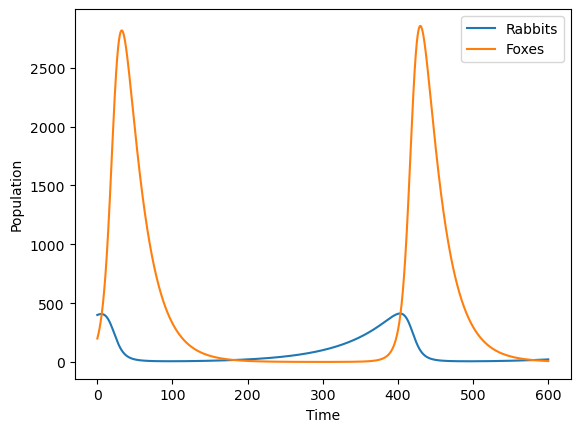

In [23]:
def dr_dt(r, f):
    return k1 * r - k2 * r * f


def df_dt(r, f):
    return k3 * r * f - k4 * f


r = np.zeros(len(times))  # making list with the desired length for r
f = np.zeros(len(times))  # making list with the desired length for f

r0 = 400  # r initial value
f0 = 200  # f initial value

r[0] = r0
f[0] = f0

for i in range(len(r) - 1):
    r[i + 1] = r[i] + step_size * dr_dt(r[i], f[i])
    f[i + 1] = f[i] + step_size * df_dt(r[i], f[i])

plt.plot(times, r, label="Rabbits")
plt.plot(times, f, label="Foxes")
plt.xlabel("Time")
plt.ylabel("Population")
plt.legend()
plt.show()

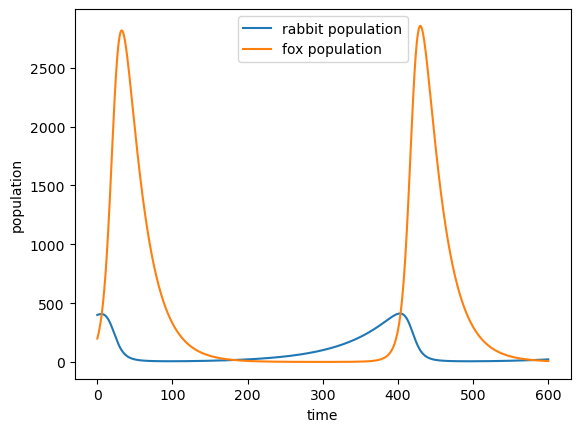

In [24]:
times = np.arange(0, end_time, step_size)  # numerical grid
Ro = 400  # initial rabbit
Fo = 200  # initial fox
# plot the number of foxes
R = np.zeros(len(times))
F = np.zeros(len(times))
R[0] = Ro
F[0] = Fo
for i in range(len(times) - 1):
    R[i + 1] = R[i] + step_size * (k1 * R[i] - k2 * R[i] * F[i])
    F[i + 1] = F[i] + step_size * (k3 * F[i] * R[i] - k4 * F[i])
plt.plot(times, R, label="rabbit population")
plt.plot(times, F, label="fox population")
plt.legend()
plt.xlabel("time")
plt.ylabel("population")
plt.show()

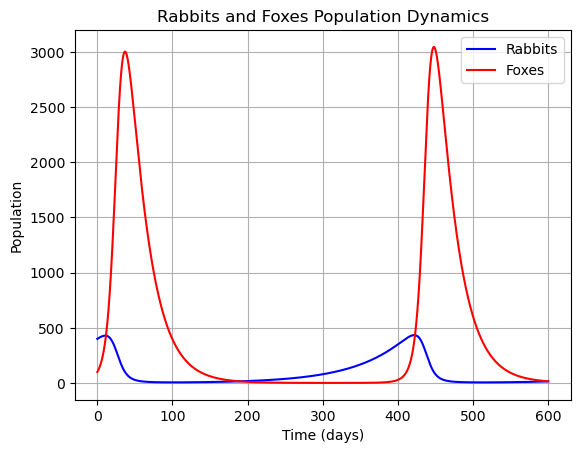

In [25]:
# step 3: define time array: because we are using Euler's method, we need to define the time array
times = np.arange(0, end_time, step_size)

# step 4: initialize arrays for rabbits and foxes
R = np.zeros(len(times))
F = np.zeros(len(times))

# step 5: Set initial conditions at n=0
R[0] = 400
F[0] = 100

# step 6: Euler's method implementation
for n in range(len(times) - 1):
    # Calculate next values using Euler's method
    R[n + 1] = R[n] + step_size * (k1 * R[n] - k2 * R[n] * F[n])
    F[n + 1] = F[n] + step_size * (k3 * R[n] * F[n] - k4 * F[n])

# step 7: Plot concentration over time
plt.figure()
plt.plot(times, R, "b-", label="Rabbits")
plt.plot(times, F, "r-", label="Foxes")
plt.xlabel("Time (days)")
plt.ylabel("Population")
plt.title("Rabbits and Foxes Population Dynamics")
plt.legend()
plt.grid(True)
plt.show()

# Convergence


We will do this more thoroughly and carefully next week, but in case you wanted to get a head start, here is what we hurried through at the end of Lecture 3:



To study how the "answer" converges, we need to decide what to use as the "answer". For now, assume we care about the maximum population of foxes.

In [26]:
max(F)

3045.046139914706

In [27]:
step_sizes = np.logspace(-3, 1, num=13)
step_sizes

array([1.00000000e-03, 2.15443469e-03, 4.64158883e-03, 1.00000000e-02,
       2.15443469e-02, 4.64158883e-02, 1.00000000e-01, 2.15443469e-01,
       4.64158883e-01, 1.00000000e+00, 2.15443469e+00, 4.64158883e+00,
       1.00000000e+01])

In [28]:
answers = []
for step_size in step_sizes:
    times = np.arange(0, end_time, step_size)  # numerical grid
    Ro = 400  # initial rabbit
    Fo = 200  # initial fox
    # One of the methods we used above:
    R = np.zeros(len(times))
    F = np.zeros(len(times))
    R[0] = Ro
    F[0] = Fo
    for i in range(len(times) - 1):
        R[i + 1] = R[i] + step_size * (k1 * R[i] - k2 * R[i] * F[i])
        F[i + 1] = F[i] + step_size * (k3 * F[i] * R[i] - k4 * F[i])

    print(f"Step size: {step_size}, Max fox population: {max(F)}")
    answers.append(max(F))

answers = np.array(answers)
answers

Step size: 0.001, Max fox population: 2804.3657055125773
Step size: 0.0021544346900318843, Max fox population: 2804.938027824155
Step size: 0.004641588833612777, Max fox population: 2806.1716874315994
Step size: 0.01, Max fox population: 2808.8324128751924
Step size: 0.021544346900318832, Max fox population: 2814.578584797361
Step size: 0.046415888336127774, Max fox population: 2827.020933641129
Step size: 0.1, Max fox population: 2854.124760908276
Step size: 0.21544346900318823, Max fox population: 2913.9328640836657
Step size: 0.46415888336127775, Max fox population: 3049.806189857514
Step size: 1.0, Max fox population: 3379.2763170130474
Step size: 2.154434690031882, Max fox population: 4301.608783346554
Step size: 4.6415888336127775, Max fox population: 8214.682958654028
Step size: 10.0, Max fox population: 9998.784757817017


array([2804.36570551, 2804.93802782, 2806.17168743, 2808.83241288,
       2814.5785848 , 2827.02093364, 2854.12476091, 2913.93286408,
       3049.80618986, 3379.27631701, 4301.60878335, 8214.68295865,
       9998.78475782])

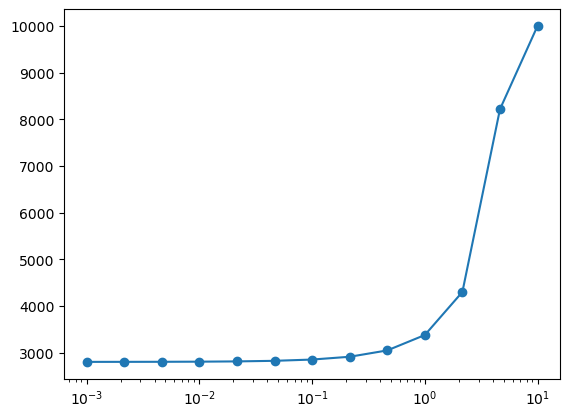

In [29]:
plt.semilogx(step_sizes, answers, "o-")

In [30]:
answers = np.array(answers)
truth = answers[0]  ## assume smallest step size is "truth"
errors = answers - truth

errors

array([0.00000000e+00, 5.72322312e-01, 1.80598192e+00, 4.46670736e+00,
       1.02128793e+01, 2.26552281e+01, 4.97590554e+01, 1.09567159e+02,
       2.45440484e+02, 5.74910612e+02, 1.49724308e+03, 5.41031725e+03,
       7.19441905e+03])

In [ ]:
# make it less rectangular
plt.loglog(step_sizes, np.abs(errors), "o-")
plt.xlabel("Step size")
plt.ylabel("Error in max fox population")
plt.grid(True)
# make it square
plt.axis("square")



(0.000630957344480193,
 11533.20638721361,
 0.3570038701926271,
 11533.562760126459)

# Using `scipy.integrate.solve_ivp`

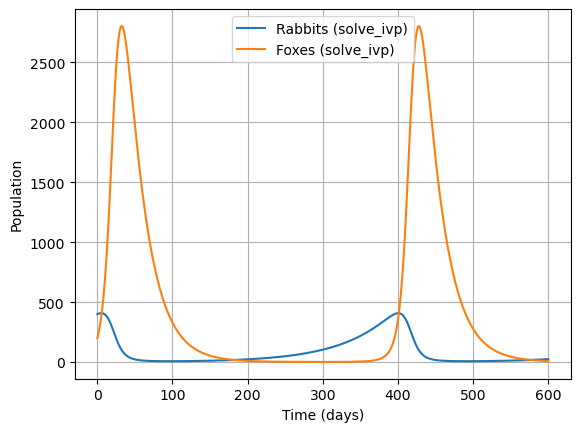

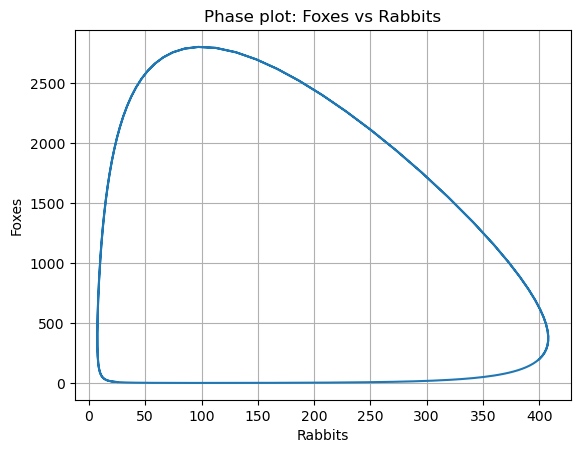

In [ ]:
from scipy.integrate import solve_ivp

def dYdt(t, y):
    r, f = y
    return [k1 * r - k2 * r * f,
            k3 * r * f - k4 * f]

y0 = [400, 200]  # initial conditions: [rabbits, foxes]
sol = solve_ivp(dYdt, (0.0, end_time), y0, rtol=1e-8, atol=1e-10)

plt.figure()
plt.plot(sol.t, sol.y[0], label="Rabbits (solve_ivp)")
plt.plot(sol.t, sol.y[1], label="Foxes (solve_ivp)")
plt.xlabel("Time (days)")
plt.ylabel("Population")
plt.legend()
plt.grid(True)

plt.figure()
plt.plot(sol.y[0], sol.y[1])
plt.xlabel("Rabbits")
plt.ylabel("Foxes")
plt.title("Phase plot: Foxes vs Rabbits")
plt.grid(True)
plt.show()

Signature:
solve_ivp(
    fun,
    t_span,
    y0,
    method='RK45',
    t_eval=None,
    dense_output=False,
    events=None,
    vectorized=False,
    args=None,
    **options,
)
Docstring:
Solve an initial value problem for a system of ODEs.

This function numerically integrates a system of ordinary differential
equations given an initial value::

    dy / dt = f(t, y)
    y(t0) = y0

Here t is a 1-D independent variable (time), y(t) is an
N-D vector-valued function (state), and an N-D
vector-valued function f(t, y) determines the differential equations.
The goal is to find y(t) approximately satisfying the differential
equations, given an initial value y(t0)=y0.

Some of the solvers support integration in the complex domain, but note
that for stiff ODE solvers, the right-hand side must be
complex-differentiable (satisfy Cauchy-Riemann equations [11]_).
To solve a problem in the complex domain, pass y0 with a complex data type.
Another option always available is to rewrite your pro